<a href="https://colab.research.google.com/github/Nicoxfl/Nicoxfl-MIT-Certificate-Data-Science/blob/main/Module_20_Assignment_20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration of word embeddings

In this notebook, examine trained word embeddings, and explore word similarities.

In [ ]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [ ]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [ ]:
model.most_similar("ugly", topn=20)

[('nasty', 0.8404348492622375),
 ('scary', 0.7924851775169373),
 ('horrible', 0.7815172076225281),
 ('awful', 0.7810375690460205),
 ('silly', 0.7666202783584595),
 ('shocking', 0.76482754945755),
 ('downright', 0.7608087062835693),
 ('bizarre', 0.7577242851257324),
 ('hideous', 0.7577001452445984),
 ('pathetic', 0.754724383354187),
 ('stupid', 0.7511321902275085),
 ('weird', 0.7436647415161133),
 ('vicious', 0.7362605929374695),
 ('disgusting', 0.7214600443840027),
 ('joke', 0.720033586025238),
 ('terrible', 0.719933032989502),
 ('dull', 0.7141441702842712),
 ('shameful', 0.713604748249054),
 ('funny', 0.7109723091125488),
 ('embarrassing', 0.7081527709960938)]

Find the cosine similarity between two words

In [ ]:
model.similarity("good", "bad")

0.79648936

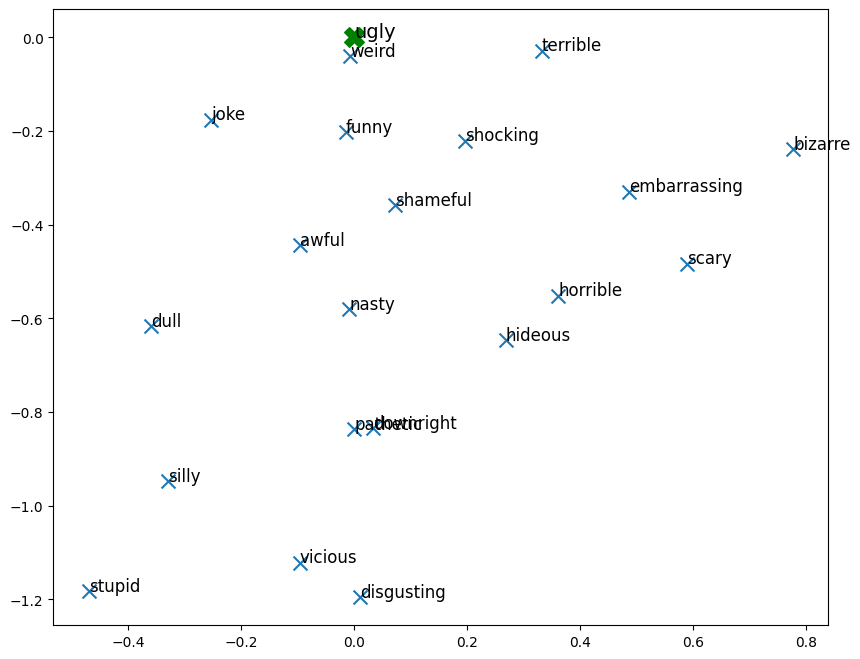

In [ ]:
import matplotlib.pyplot as plt

word = 'ugly'
similar_words = model.similar_by_word(word, topn=20)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
x = [vector[0] for vector in similar_word_vectors]
y = [vector[1] for vector in similar_word_vectors]
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, marker='x', s=100) # set marker as 'x' and increase size to 100

# add labels for the similar words
for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax.annotate(word, (x[i], y[i]), size=12) # increase size of the word labels to 12

# add the original word at origin
word = 'ugly'
ax.scatter(0, 0, marker='X', s=200, color='green')
ax.annotate(word, (0, 0), size=14)

# show the plot
plt.show()